<a href="https://colab.research.google.com/github/mehdihatami1998/DynamicsOfStructures/blob/main/L05_Aliasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aliasing

Given a sampling rate $\Delta t$, we want to show that a harmonic function (here, a cosine)
with a frequency higher than the the Nyquist frequency $\omega_\text{Ny} = \frac{\pi}{\Delta t}$
cannot be distinguished by a lower frequency harmonic, sampled with the same time step.

## Definitions

First, we import a Matlab-like set of commands,

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

To be concrete, we'll use $\Delta t = 0.4$ s and a fundamental period $T_n=20$ s, hence a number of samples per period $N=50$, or $2.5$ samples per second.

In [ ]:
Tp   = 20.0
N    = 50
step = Tp/N

To the previous values, we associate the fundamental frequency of the DFT and the corresponding Nyquist frequency.

In [ ]:
dw = 2*np.pi/Tp
wny  = dw*N/2
print("omega_1 =", dw)
print("Nyquist freq. =",wny,"rad/s =", wny/dw, '* omega_1')

omega_1 = 0.3141592653589793
Nyquist freq. = 7.853981633974483 rad/s = 25.0 * omega_1


For comparison, we want to plot our functions also with a high
sampling rate, so that we create the illusion of plotting a continuous function, so we say

In [ ]:
M = 1000

t_n = np.linspace(0.0,Tp,N+1)
t_m = np.linspace(0.0,Tp,M+1)

The Nyquist circular frequency is $25\Delta\omega$.

The functions that we want to sample and plot are

$$\cos(h\Delta\omega t)\quad\text{and}\quad\cos((h-N)\Delta\omega t),$$

in this example it is $h=47$ but it works with different values of $h$ as well...

In the following, `hs` and `ls` mean high and low sampling frequency, while `hf` and `lf`
mean high and low cosine frequency. Note that `t_m` and `t_n` are vectors, and also `c_hs_hf` etc
are vectors too.

In [ ]:
hf = 47
lf = hf - N

c_hs_hf = np.cos(hf*dw*t_m)
c_hs_lf = np.cos(lf*dw*t_m)

c_ls_hf = np.cos(hf*dw*t_n)
c_ls_lf = np.cos(lf*dw*t_n)

First, we plot the harmonics with a high frequency sampling (visually continuous, that is).

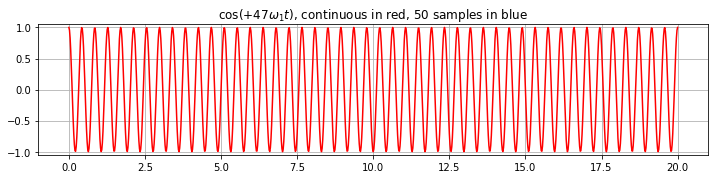

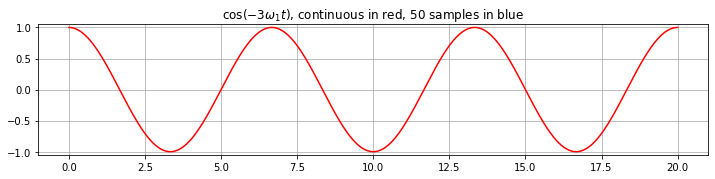

In [ ]:
plt.figure(1, figsize=(12,2.4))
plt.plot(t_m,c_hs_hf,'-r')
plt.ylim((-1.05,+1.05)) ; plt.grid(1)
plt.title(r'$\cos(%+3d\omega_1t)$, continuous in red, 50 samples in blue'%(hf,))

plt.figure(2, figsize=(12,2.4))
plt.plot(t_m,c_hs_lf,'-r')
plt.ylim((-1.05,+1.05)) ; plt.grid(1)
plt.title(r'$\cos(%+3d\omega_1 t)$, continuous in red, 50 samples in blue'%(lf,));

Not surprisingly, the two plots are really different.

In the next plots, we are going to plot the _continuous_ functions in red, and to place a blue dot in every (t,f) point that was chosen for a low sampling rate.

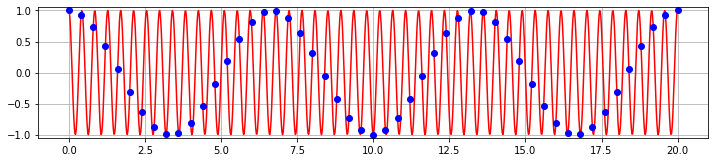

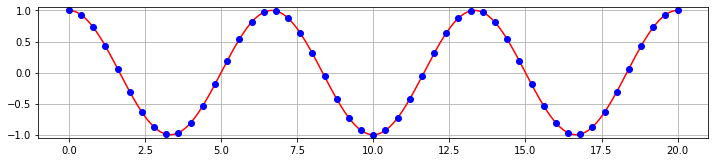

In [ ]:
plt.figure(1, figsize=(12,2.4))
plt.plot(t_m,c_hs_hf,'-r',t_n,c_ls_hf,'ob')
plt.ylim((-1.05,+1.05)) ; plt.grid(1);

plt.figure(2, figsize=(12,2.4))
plt.plot(t_m,c_hs_lf,'-r',t_n,c_ls_lf,'ob')
plt.ylim((-1.05,+1.05)) ; plt.grid();

If you look at the patterns of the dots they seem, at least, very similar. _What happens is aliasing!_

It's time to plot _only_ the functions sampled at a low rate: 

   - the high frequency cosine, sampled at 2.5 samples per second, blue line,
   - the low frequency cosine, sampled at 2.5 samples per second, red crosses only.

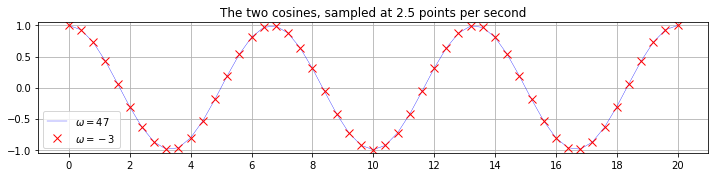

In [ ]:
plt.figure(3, figsize=(12, 2.4))
plt.grid(1)
plt.title('The two cosines, sampled at 2.5 points per second')

#figure(3)
plt.plot(t_n,c_ls_hf,'-b', linewidth=.33, label='$\omega=47$')
plt.plot(t_n,c_ls_lf,'xr', markersize=8, label='$\omega=-3$')
plt.xticks((0, 2,4,6,8,10,12,14,16,18,20))
plt.ylim((-1.05,+1.05))
plt.legend();

Let's look at the difference between the high frequency cosine and the low frequency cosine, for a slow sampling rate...

Text(0.5, 1.0, 'Difference')

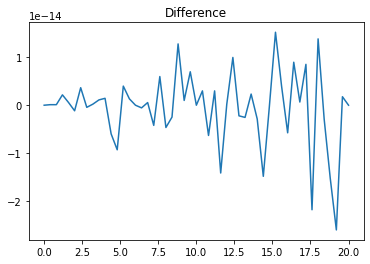

In [ ]:
plt.plot(t_n, c_ls_hf-c_ls_lf)
plt.title('Difference')